In [1]:
from lib.csv_scores import *
import matplotlib.pyplot as plt

## Lets read in the data

In [2]:
UCLA_csv = "../misc/pairwise_annot.csv"
luca_csv = "../misc/pairwise_annot_luca_ecb.csv"

In [3]:
df_UCLA_raw = pd.read_csv(UCLA_csv, index_col=0)
df_luca_raw = pd.read_csv(luca_csv, index_col=0)

## First, lets process image raw scores

In [4]:
UCLA_csv_out = "output/UCLA_raw_scores.csv"
luca_csv_out = "output/luca_1000_raw_scores.csv"
if not os.path.exists(UCLA_csv_out):
    GenerateChoixScores(df_UCLA_raw, UCLA_csv_out)
    
if not os.path.exists(luca_csv_out):
    GenerateChoixScores(df_luca_raw, luca_csv_out)

In [5]:
# read scores and mini max them
df_UCLA = MinMax(ReadScoresFromCsv(UCLA_csv_out), "violence")
df_luca = MinMax(ReadScoresFromCsv(luca_csv_out), "violence")

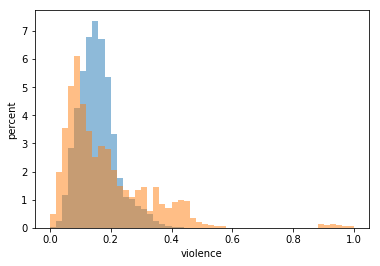

In [6]:
# check distribution
plt.hist(df_UCLA['violence'], 50, label = "UCLA", alpha=0.5, density = 1)
plt.hist(df_luca['violence'], 50, label = "luca", alpha=0.5, density = 1)
plt.xlabel('violence')
plt.ylabel('percent')
plt.show()

Below here we use the Kolmogorov–Smirnov to evaluate if both distributions come from the same population. The interpretation of the p value according to https://www.graphpad.com/guides/prism/7/statistics/interpreting_results_kolmogorov-smirnov_test.htm?toc=0&printWindow is as follows:

"If the two samples were randomly sampled from identical populations, what is the probability that the two cumulative frequency distributions would be as far apart as observed?"

In [7]:
print(stats.ks_2samp(df_UCLA['violence'], df_luca['violence']).pvalue)

7.228869847691746e-27


Uuuh, it does not look like they come from the same distribution

## Now, lets do the same considering we clip it

In [8]:
df_UCLA_clipped = MinMax(ClipValues(df_UCLA, 0.43), 'violence')
df_luca_clipped = MinMax(ClipValues(df_luca, 0.62), 'violence')

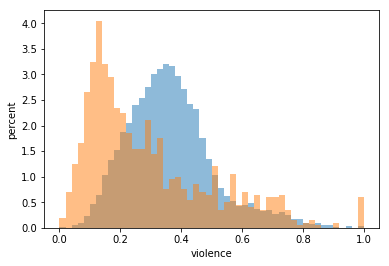

In [9]:
# check distribution
plt.hist(df_UCLA_clipped['violence'], 50, label = "UCLA", alpha=0.5, density = 1)
plt.hist(df_luca_clipped['violence'], 50, label = "luca", alpha=0.5, density = 1)
plt.xlabel('violence')
plt.ylabel('percent')
plt.show()

In [10]:
print(stats.ks_2samp(df_UCLA_clipped['violence'], df_luca_clipped['violence']).pvalue)

4.4701117925180545e-98


Uhhhh x2, even worst. Definitely not the same distribution

## All right, now lets have a look at the effect of clipping

The aim here is to investigate if we loose precision by clipping images. In order to do that, we visually inspect the differences between the images with labels bigger than the cut point, and images slightly below the cut point

### First lets look at UCLA

In [11]:
UCLA_very_violent = df_UCLA[df_UCLA['violence'] > 0.43]
UCLA_cut_point = df_UCLA[(df_UCLA['violence'] <= 0.43) & (df_UCLA['violence'] >= 0.38) ]

In [12]:
images_dir = "../images"
images_to_print = 5

### Ivestigating mages close to 1

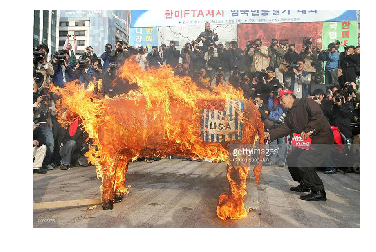

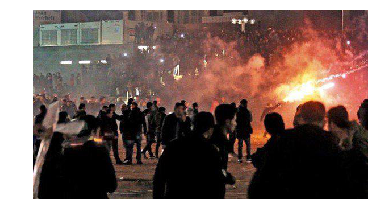

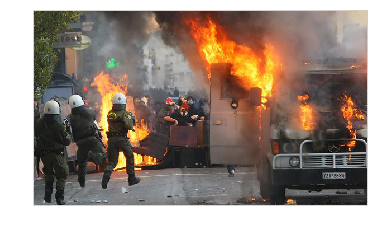

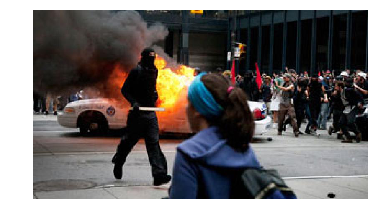

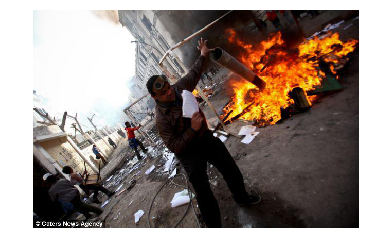

In [13]:
img_paths = UCLA_very_violent['fname'].tolist()

for img_path in img_paths[:images_to_print]:
    path = os.path.join(images_dir, img_path)
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Ivestigating mages close to the cut point

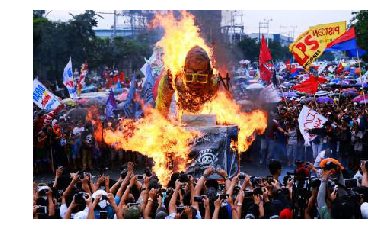

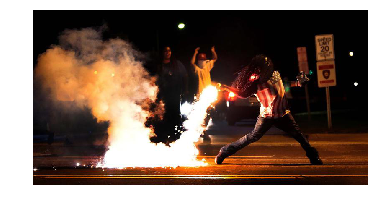

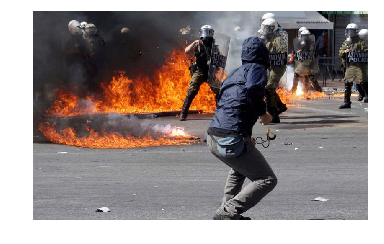

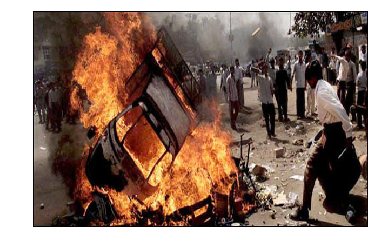

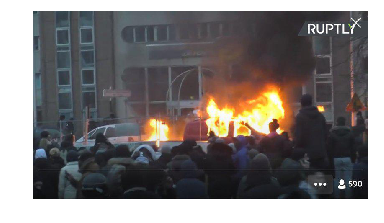

In [14]:
img_paths = UCLA_cut_point['fname'].tolist()

for img_path in img_paths[:images_to_print]:
    path = os.path.join(images_dir, img_path)
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Images close to 1 do not seem to differ much from the images that are close to our clipping point. This indicates that we probably should treat them as outliners in terms of scores. In other words, pulling their scores closer to each other should not cause us a lost in precision in the range of violence

### Now lets look at Luca data

In [15]:
luca_very_violent = df_luca[df_luca['violence'] > 0.6]
luca_cut_point = df_luca[(df_luca['violence'] <= 0.6) & (df_luca['violence'] >= 0.5) ]

### Ivestigating mages close to 1

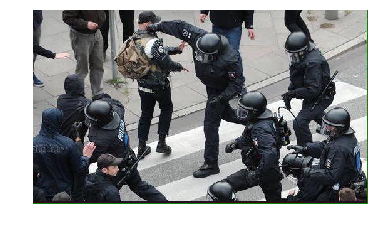

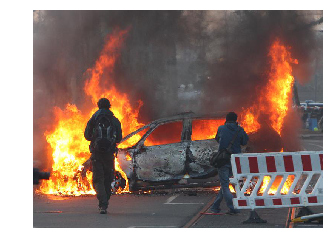

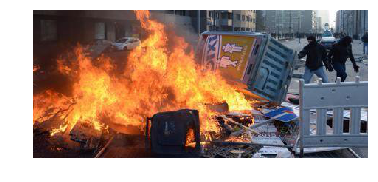

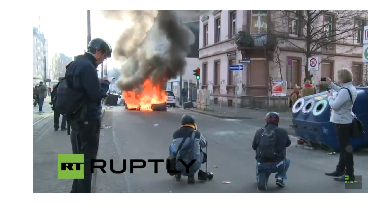

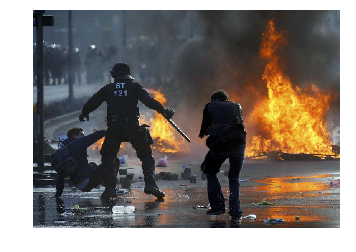

In [16]:
img_paths = luca_very_violent['fname'].tolist()

for img_path in img_paths[:images_to_print]:
    path = os.path.join(images_dir, img_path)
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Ivestigating mages close to the cut point

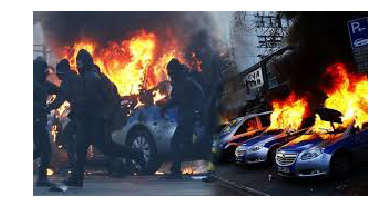

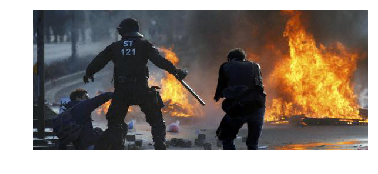

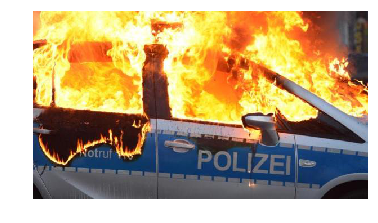

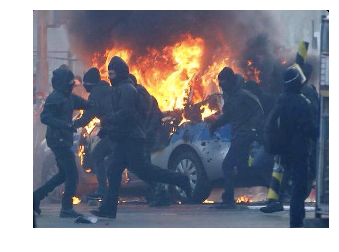

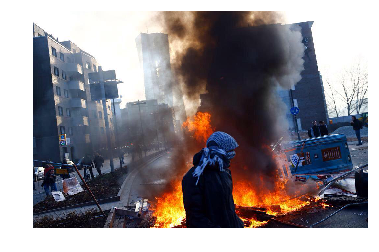

In [17]:
img_paths = luca_cut_point['fname'].tolist()

for img_path in img_paths[:images_to_print]:
    path = os.path.join(images_dir, img_path)
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

It seems that the statement above also holds for Luca's dataset

# Joined scores

### Load the data

In [18]:
ITU_UCLA_sample = "../misc/pairwise_annot_intersection_200_UCLA_ITU.csv"
df_ITU_UCLA_sample_raw = pd.read_csv(ITU_UCLA_sample, index_col=0)

In [19]:
# combine data frame scores for ITU + UCLA + UCLA_ITU Sample
df_combined_raw = df_ITU_UCLA_sample_raw.append([df_UCLA_raw, df_luca_raw])
print((len(df_combined_raw) == len(df_ITU_UCLA_sample_raw) + len(df_UCLA_raw) + len(df_luca_raw)))

True


### Generate scores

In [20]:
ITU_UCLA_combined_out = "output/ITU_UCLA_combined_raw_scores.csv"
    
if not os.path.exists(ITU_UCLA_combined_out):
    GenerateChoixScores(df_combined_raw, ITU_UCLA_combined_out)

In [21]:
# read scores and mini max them
df_ITU_UCLA_combined = MinMax(ReadScoresFromCsv(ITU_UCLA_combined_out), "violence")

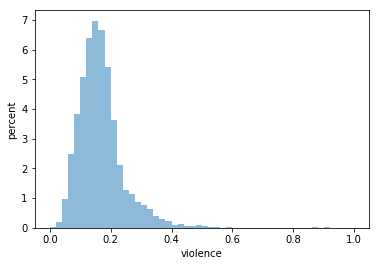

In [22]:
# check distribution
plt.hist(df_ITU_UCLA_combined['violence'], 50, alpha=0.5, density = 1)
plt.xlabel('violence')
plt.ylabel('percent')
plt.show()

In [23]:
# What is the percentage of observations with label above 0.43 on the combined dataset?
percen_43 = (len(df_ITU_UCLA_combined[df_ITU_UCLA_combined['violence'] > 0.43]) / len(df_ITU_UCLA_combined)) * 100
# What is the percentage of observations with label above 0.6 on the combined dataset?
percen_60 = (len(df_ITU_UCLA_combined[df_ITU_UCLA_combined['violence'] > 0.6]) / len(df_ITU_UCLA_combined)) * 100

print("percentage above .43 is ", percen_43, "%", " percentage above .6 is ", percen_60, "%")

percentage above .43 is  0.9874397661742633 %  percentage above .6 is  0.13429180819969982 %


In [24]:
# What is the percentage of observations with label above 0.43 in the original UCLA?
percen_43_UCLA = (len(df_UCLA[df_UCLA['violence'] > 0.43]) / len(df_UCLA)) * 100
print("percentage above .43 is ", percen_43_UCLA, "%")

percentage above .43 is  0.042885324641907537 %


Since the original clipping was done visually, it gets a bit tricky now to do the same since we have a tail that is more spread out

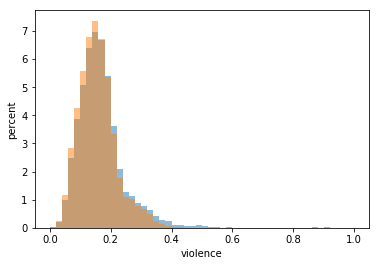

In [25]:
# check it against original UCLA
plt.hist(df_ITU_UCLA_combined['violence'], 50, label = "UCLA", alpha=0.5, density = 1)
plt.hist(df_UCLA['violence'], 50, label = "UCLA", alpha=0.5, density = 1)
plt.xlabel('violence')
plt.ylabel('percent')
plt.show()

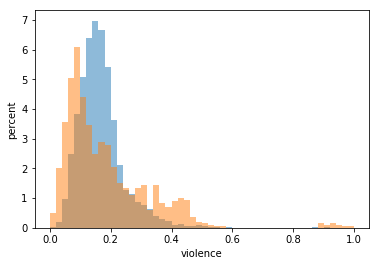

In [26]:
# check it against original ITU
plt.hist(df_ITU_UCLA_combined['violence'], 50, label = "UCLA", alpha=0.5, density = 1)
plt.hist(df_luca['violence'], 50, label = "luca", alpha=0.5, density = 1)
plt.xlabel('violence')
plt.ylabel('percent')
plt.show()

### Effect of clipping in different points

In [27]:
images_dir = "../images"
images_to_print = 5

In [28]:
df_ITU_UCLA_combined_close1 = df_ITU_UCLA_combined[df_ITU_UCLA_combined['violence'] > 0.8]
df_ITU_UCLA_combined_closecut43 = df_ITU_UCLA_combined[(df_ITU_UCLA_combined['violence'] <= 0.43) & (df_ITU_UCLA_combined['violence'] >= 0.43 - 0.05) ]
df_ITU_UCLA_combined_closecut6 = df_ITU_UCLA_combined[(df_ITU_UCLA_combined['violence'] <= 0.6) & (df_ITU_UCLA_combined['violence'] >= 0.6 - 0.05) ]


** CLOSE TO 1 **

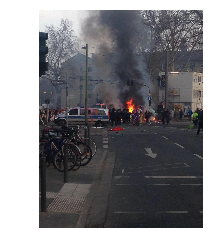

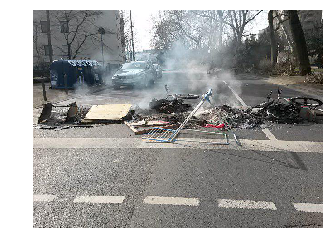

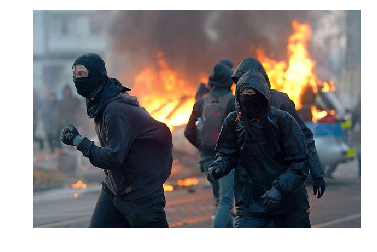

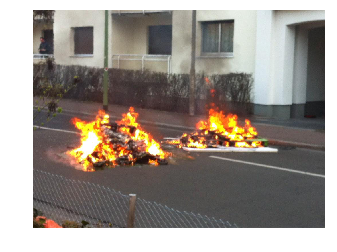

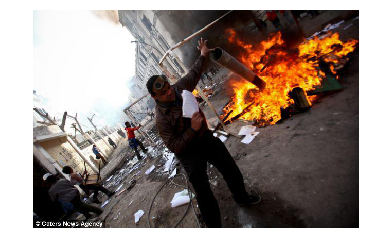

In [29]:
img_paths = df_ITU_UCLA_combined_close1['fname'].tolist()

for img_path in img_paths[:images_to_print]:
    path = os.path.join(images_dir, img_path)
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

It is worring that our images close to 1 are only in our dataset. Perhaps 200 comparisons are not enough to force the scores to adapt through transitivity

** CLOSE TO .6 **

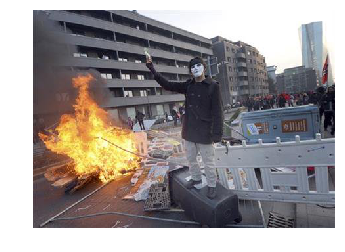

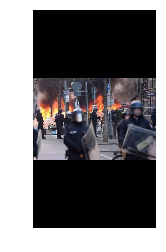

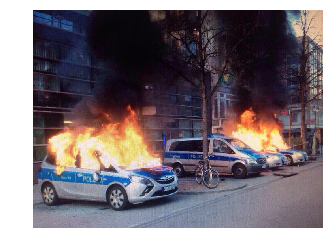

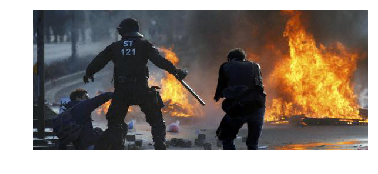

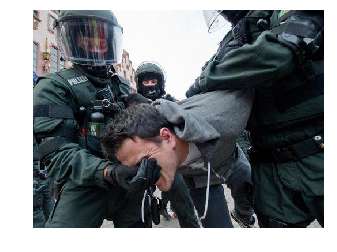

In [30]:
img_paths = df_ITU_UCLA_combined_closecut6['fname'].tolist()

for img_path in img_paths[:images_to_print]:
    path = os.path.join(images_dir, img_path)
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Clipping at this point seems safe, but still images are only from our dataset

** CLOSE TO .43 **

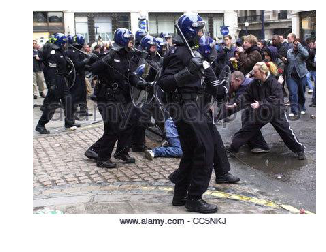

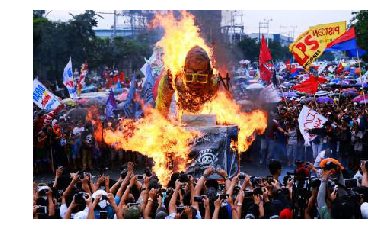

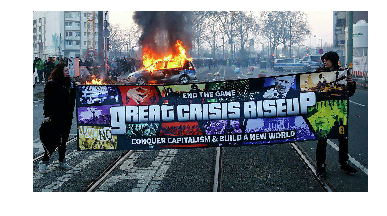

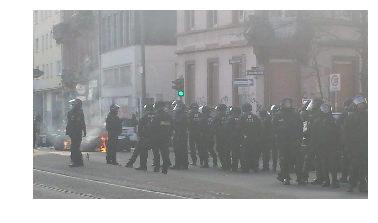

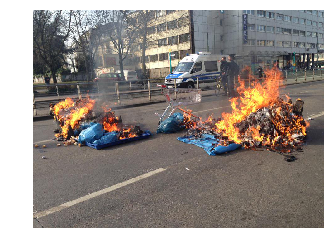

In [31]:
img_paths = df_ITU_UCLA_combined_closecut43['fname'].tolist()

for img_path in img_paths[:images_to_print]:
    path = os.path.join(images_dir, img_path)
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Now we see UCLA images, and clipping still seems reasonable

**Analysing now how many UCLA images are more violent than 0.43 **

In [55]:
df_bigger_43_combined = df_ITU_UCLA_combined[df_ITU_UCLA_combined['violence'] >= 0.43]

In [51]:
print(len(df_bigger_43_combined[df_bigger_43_combined['fname'].str.startswith('train')]) + len(df_bigger_43_combined[df_bigger_43_combined['fname'].str.startswith('test')]), " images come from the UCLA dataset and are more than 0.43 violent")

8  images come from the UCLA dataset and are more than 0.43 violent


In [54]:
print("versus ", len(df_bigger_43_combined), " from ITU")

versus  125  from ITU


In [56]:
print ("before, UCLA had ", len(df_UCLA[df_UCLA['violence'] >= 0.43]))

before, UCLA had  5


However, our images seem to dominate the violent scenarios, which indicate that transitivity is probably not enough given our sample size of the combined sets